In [1]:
from torch import nn
import torch.nn.functional as F
import torch
from torch.utils.data import  DataLoader
from pathlib import Path
from IPython.display import clear_output
import sys
sys.path.append('../src')
from my_network import *
from dataloader import WisdmDatasetParser, WisdmDataset

from assistant import Assistant
from stats import LearningStats
from utils import *

class model(nn.Module):
    def __init__(self, input_size, output_size):
        super(model, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=250)
        self.output = nn.Linear(250, output_size)

    def forward(self, x):
        #print("x shape", x.shape)
        x = torch.swapaxes(x, 1,0)
        x = torch.swapaxes(x, 2,0)
        h0 = torch.zeros(1, x.size(1), 250)
        c0 = torch.zeros(1, x.size(1), 250)
        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.output(out)
        return out
    
#{"lr":0.0023,"batch_size":256.0,"hidden_size":250.0}
class LSTMNet(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.model = model(input_size, output_size)

    def forward(self, input):
        output = self.model(input)
        return output
    

class loss_wrapper():
    def __init__(self):
        self.loss = nn.CrossEntropyLoss()
    
    def __call__(self, output, target):
        return self.loss(output.sum(0), target)

In [2]:
DATASET_NAME = 'watch_subset2_40_Ben.npz'
DATASET_SUBSET = None
NUM_WORKERS = 8
batch_size = 256

dataset = WisdmDatasetParser(f'{Path.home()}/snntorch_network/data/{DATASET_NAME}', norm=None, class_sublset=DATASET_SUBSET)
train_set = dataset.get_training_set()
val_set = dataset.get_validation_set()
test_set = dataset.get_test_set()

train_dataset = WisdmDataset(train_set)
val_dataset = WisdmDataset(val_set)
test_dataset = WisdmDataset(test_set)

train_loader = DataLoader(dataset=train_dataset, batch_size=int(batch_size), shuffle=True, num_workers=NUM_WORKERS)
val_loader  = DataLoader(dataset= val_dataset, batch_size=int(batch_size), shuffle=True, num_workers=NUM_WORKERS)
test_loader = DataLoader(dataset=test_dataset, batch_size=int(batch_size), shuffle=False, num_workers=NUM_WORKERS)

(6,)
(6,)
ytrain shape (21720, 7)
yval shape (7240, 7)
ytest shape (7241, 7)
num classes train dataset: 7 occurrences of each class:[3189 2987 3083 3262 3046 3071 3082]
num classes eval dataset: 7 occurrences of each class:[1050 1017  982  998 1058 1055 1080]
num classes test dataset: 7 occurrences of each class:[1031  948 1014 1076 1062 1038 1072]


In [3]:
# tqdm_dataloader = tqdm(test_loader)
# loss = 0
# item_count = 0
# total_correct = 0
# for _, batch in enumerate(tqdm_dataloader): #eval loop
#     with torch.no_grad():
#         input, label = batch
#         #print("input shape", input)
#         #print("input shape", input.shape)
#         output = net(input)
#         #print("output shape", output)
#         batch_loss = loss_fn(output.sum(0), label)
#         loss += batch_loss * len(label)
#         item_count += len(label)
#         _, idx = output.sum(dim=0).max(1)
#         # print("idx shape", idx)
#         # print("label shape", label)
#         batch_accuracy = (label == idx).sum() / len(label)
#         total_correct += (label == idx).sum()
#         tqdm_dataloader.set_description(f'\r Testing results: Loss: {loss / item_count:.4f}, Accuracy{total_correct / item_count:.4f}, BATCH ACCURACY: {batch_accuracy:.4f} batch_loss: {batch_loss:.4f}')

In [4]:
DATASET_NAME = 'data_watch_subset_0_40.npz'
DATASET_SUBSET = 'custom'
SUBSET_LIST = [0, 2, 6, 8, 9, 14, 17]
PATIENCE = 12
TRAIN_FOLDER_NAME = 'Trained'
NUM_WORKERS = 8
NET_OUTPUT_DIM = 7
NET_INPUT_DIM = 6
NUM_EPOCHS = 100
SEARCH_SPACE_SHUFFLE = 200
trained_folder = TRAIN_FOLDER_NAME
os.makedirs(trained_folder, exist_ok=True)

In [5]:
# net = LSTMNet(6, 7)
# checkpoint = torch.load("LSTM.pt")
# print(checkpoint.keys())
# #net.load_state_dict(checkpoint)

# optimizer = torch.optim.Adam(net.parameters(), lr=0.0023, betas=(0.9, 0.999))

# loss_fn = loss_wrapper()
# stats = LearningStats()
# assistant = Assistant(net, loss_fn, optimizer, stats, classifier=True)


In [6]:
# subsets_list = {
#     'best_Marco':[1, 6, 7, 8, 13, 14, 17],
#     'my_best':[0, 2, 6, 8, 9, 14, 17],
#     'second_best':[0, 4, 6, 8, 9, 10, 14],
#     'best_mse':[4, 5, 8, 9, 11, 14, 17],
#     'subset_2':[6, 7, 8, 9, 10, 11, 12],
#     'balanced':[0, 1, 4, 8, 9, 10, 14]
# }
subsets_list = {

    'blbla':[4, 5, 8, 9, 11, 14, 17]
}


[Epoch  1/100] Training: loss =     0.94806 (min =     1.53566)     accuracy = 0.66732 (max = 0.55360) :  92%|█████████▏| 78/85 [00:05<00:00, 13.06it/s]


KeyboardInterrupt: 

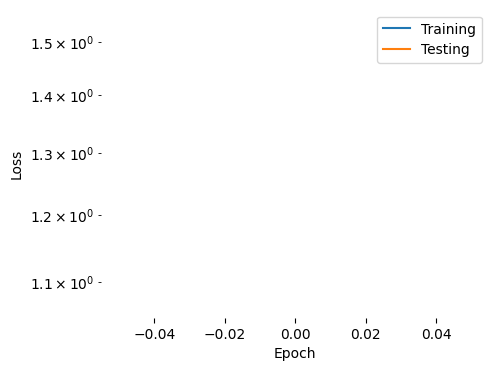

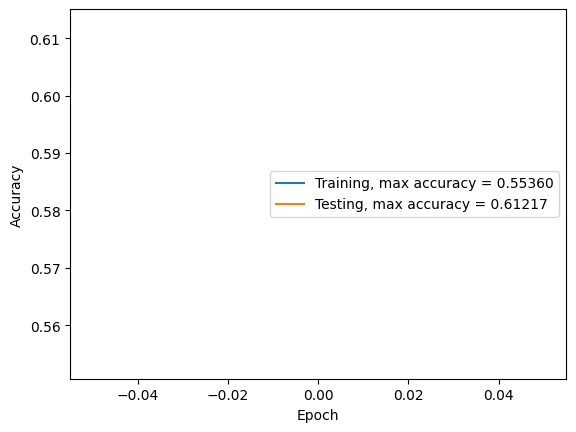

In [7]:
for name, subset in subsets_list.items():
    DATASET_NAME = 'data_watch_subset_0_40.npz'
    DATASET_SUBSET = 'custom'
    SUBSET_LIST = subset
    NUM_WORKERS = 8
    batch_size = 256
    print(f'Working on {name}, with subset {subset}')
    dataset = WisdmDatasetParser(f'{Path.home()}/snntorch_network/data/{DATASET_NAME}', norm=None, class_sublset=DATASET_SUBSET, subset_list=SUBSET_LIST)
    train_set = dataset.get_training_set()
    val_set = dataset.get_validation_set()

    train_dataset = WisdmDataset(train_set)
    val_dataset = WisdmDataset(val_set)
    test_dataset = WisdmDataset(test_set)

    train_loader = DataLoader(dataset=train_dataset, batch_size=int(batch_size), shuffle=True, num_workers=NUM_WORKERS)
    val_loader  = DataLoader(dataset= val_dataset, batch_size=int(batch_size), shuffle=True, num_workers=NUM_WORKERS)

    trained_folder = 'LSTM-benchmark'+'/'+name
    os.makedirs(trained_folder, exist_ok=True)
    net = LSTMNet(6, 7)
    checkpoint = torch.load("LSTM.pt")
    print(checkpoint.keys())
    #net.load_state_dict(checkpoint)

    optimizer = torch.optim.Adam(net.parameters(), lr=0.0023, betas=(0.9, 0.999))

    loss_fn = loss_wrapper()
    stats = LearningStats()
    assistant = Assistant(net, loss_fn, optimizer, stats, classifier=True)
    count = 0
    for epoch in range(NUM_EPOCHS):
        labels = []
        outputs = []
        # if epoch % 20 == 0:
        #     assistant.reduce_lr()
        if count < PATIENCE:
            count = count+1
            tqdm_dataloader = tqdm(train_loader)
            for _, batch in enumerate(tqdm_dataloader): # training loop
                input, label = batch
                output = assistant.train(input, label)
                tqdm_dataloader.set_description(f'\r[Epoch {epoch:2d}/{NUM_EPOCHS}] Training: {stats.training}', refresh=False)

            tqdm_dataloader = tqdm(val_loader)
            for _, batch in enumerate(tqdm_dataloader): #eval loop
                input, label = batch
                output = assistant.test(input, label)
                tqdm_dataloader.set_description(f'\r[Epoch {epoch:2d}/{NUM_EPOCHS}] Validation: {stats.testing}')
        
                if len(outputs) == 0:
                    outputs = output.to('cpu').detach()
                    labels = label.to('cpu').detach()
                else:
                    outputs = torch.cat((outputs, output.to('cpu').detach()), dim=1)
                    labels = torch.cat((labels, label.to('cpu').detach()))
            
            stats.update()

            if stats.testing.best_accuracy:
                count = 0
                _, predictions = outputs.sum(dim=0).max(1)
                gen_confusion_matrix(predictions,labels, f'./{trained_folder}/')
                del predictions
            del labels
            del outputs
            stats.save( f'./{trained_folder}/')
            stats.plot(path=f'./{trained_folder}/')
            torch.cuda.empty_cache()
        else:
            print('Early stopping')
            break
        clear_output(wait=True)
    